# Topic Map

In [5]:
import os
import pandas as pd
import re
import nltk
from nltk import sent_tokenize, word_tokenize
nltk.download('punkt')

transcription_dir_location_en = '../data/processed/transcription/en/'

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/frasercrichton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
docs = []

def parse_text(file_location): 
    transcriptions_df = pd.read_json(file_location)
    transcription_text = transcriptions_df[0].iloc[0]
    
    # only analyse files with sentences with more then 27 words
    if len(transcription_text.split()) < 27:
        print(f'Small number of words: {file_location} {transcription_text}')
        # return
    
    sentence_list = sent_tokenize(transcription_text)
    sentences = []
    for sentence in sentence_list:
        # if 'brothers' in sentence:
        #     print(sentence)   
        docs.append(sentence)
        # sentences.append(sentence)
    # docs.append(' '.join(sentences))
    
for file_name in os.listdir(transcription_dir_location_en):
    parse_text(transcription_dir_location_en + file_name)

# docs = list(filter(None, docs))
docs

Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7147206448232074502.json gentlemen, It was the day of defeat. But this is not the day to get things done. Well, that wasn't really the case. That's fine. 
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7147263913200045317.json September twenty-fifth I've said it all. 
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7135145359629634822.json 
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7144425341279341830.json I am
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7070073900100521222.json who goes M design, yo. 
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7144420910336953606.json 
Small number of words: ../data/processed/transcription/en/TranscribeTikTokAudio7143163842665663749.json 
Small number of words: ../data/processed/transcription/en/Transcribe

['Another important chapter of our work in recent days concerns healthcare.',
 'The government has allocated over one billion euros for Regions and autonomous provinces, to limit the impact of payback in medical devices, on companies in the sector and to strengthen emergency rooms.',
 'Because the scenes of degradation, abandonment, confusion that we sometimes see in a difficult moment in our lives, that is, when we need emergency healthcare, are not tolerable.',
 'So we decided to increase the salaries and overtime resources of emergency room doctors.',
 'We have decided to limit the possibility that those who work in the public sector can easily and simultaneously also do so in the private sector, the so-called paid doctors.',
 'And we have decided to introduce harsher penalties for those who attack healthcare workers.',
 'Because it has also become intolerable that workers who do delicate and difficult work to save the lives of other people also have to fear for their own safety.',


In [91]:
# transcriptions_df = pd.read_json(transcription_dir_location_en + 'TranscribeTikTokAudio7074130814199516422.json').sample().summaries.to_list()

# # transcriptions_df[0].iloc[0].summaries.to_list()
# transcriptions_df

In [140]:
# keywords

from keybert import KeyBERT

kw_model = KeyBERT()
# keywords = kw_model.extract_keywords(docs)
all_text = ' '.join(docs)
#  keyphrase_ngram_range=(1, 2),
keywords = kw_model.extract_keywords(all_text, stop_words='english', highlight=True)
keywords


Another important chapter of our work in recent days concerns healthcare The government has allocated over one 
billion euros for Regions and autonomous provinces to limit the impact of payback in medical devices on companies 
in the sector and to strengthen emergency rooms Because the scenes of degradation abandonment confusion that we 
sometimes see in difficult moment in our lives that is when we need emergency healthcare are not tolerable So we 
decided to increase the salaries and overtime resources of emergency room doctors We have decided to limit the 
possibility that those who work in the public sector can easily and simultaneously also do so in the private sector
the so called paid doctors And we have decided to introduce harsher penalties for those who attack healthcare 
workers Because it has also become intolerable that workers who do delicate and difficult work to save the lives of
other people also have to fear for their own safety Thanks to the government latest measure there will be more 
police officers in almost two hundred hospitals and it is obviously the very first part of an overall reform that 
we want to carry out on healthcare so that citizens can trust Italian public hospitals again This year marks the 
tenth anniversary of the foundation of Fratelli Italia and will be celebrated in Piazza del Popolo from Thursday to
Saturday in Rome Christmas Village Political debates way to create community This week we will take Giorgia notes 
in the square in Piazza del Popolo on Saturday afternoon at half past five wait for you one hundred days after the 
inauguration of the new government We decided to take stock of our work We asked ourselves if we had done at least 
one useful thing Every day we collected them all and there were more We have decided to collect the main ones so 
that every Italian can take stock of our activity We have collected the main one hundred one hundred actions in one
hundred days from the measures against the mafia such as the maintenance of the impediment prison up to the fight 
against illegality also done with carpet checks in the stations and starting the procedures for over ten thousand 
hirings in the police forces order We have brought about change of pace for the State in combating illegality from 
the fight against illegal immigration with the decree on NGOs the recognition by the European Union of the need to 
address the problem in structural way as requested by Italy up to the management of legal immigration setting the 
quotas of those who can come to work in Italy respecting the rules We have begun to defend our borders from human 
traffickers from support for Ukraine to the Mattei plan for Africa through over sixty contacts and meetings with 
the leaders of as many nations We have projected Italy as new leading nation on an international level from the 
investment of thirty billion to lower the price of bills for families and businesses to the increase in the 
production of renewable energy the extraction of gas in our seas up to the battle won for European cap on the price
of gas We have contributed to defending Italian energy security from the tightening of citizenship income to the 
cut in taxes on employment through incentives for new hires We have established the principle that those who cannot
work must have assistance but those who can work must have work from the increase in the number of families who 
could access discounts on bills to the resources to combat the expensive shopping cart through the experimentation 
of food income For those in absolute poverty we have strengthened solidarity towards the most vulnerable From the 
extension of the Solidarity Fund for mortgages and the guarantee fund for the purchase of the first home for young 
couples through to the rule that allows everyone to transform the variable rate mortgage into fixed rate mortgage 
we have given hand in defending the right to housing from the fiscal truce to the extension of the flat tax 

[('hospitals', 0.4144),
 ('officers', 0.4114),
 ('bureaucratic', 0.3771),
 ('bureaucracy', 0.3767),
 ('hospital', 0.3682)]

Loading dataset...
done in 0.004s.
Extracting tf-idf features for NMF...
done in 0.032s.
Extracting tf features for LDA...
done in 0.024s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.163s.


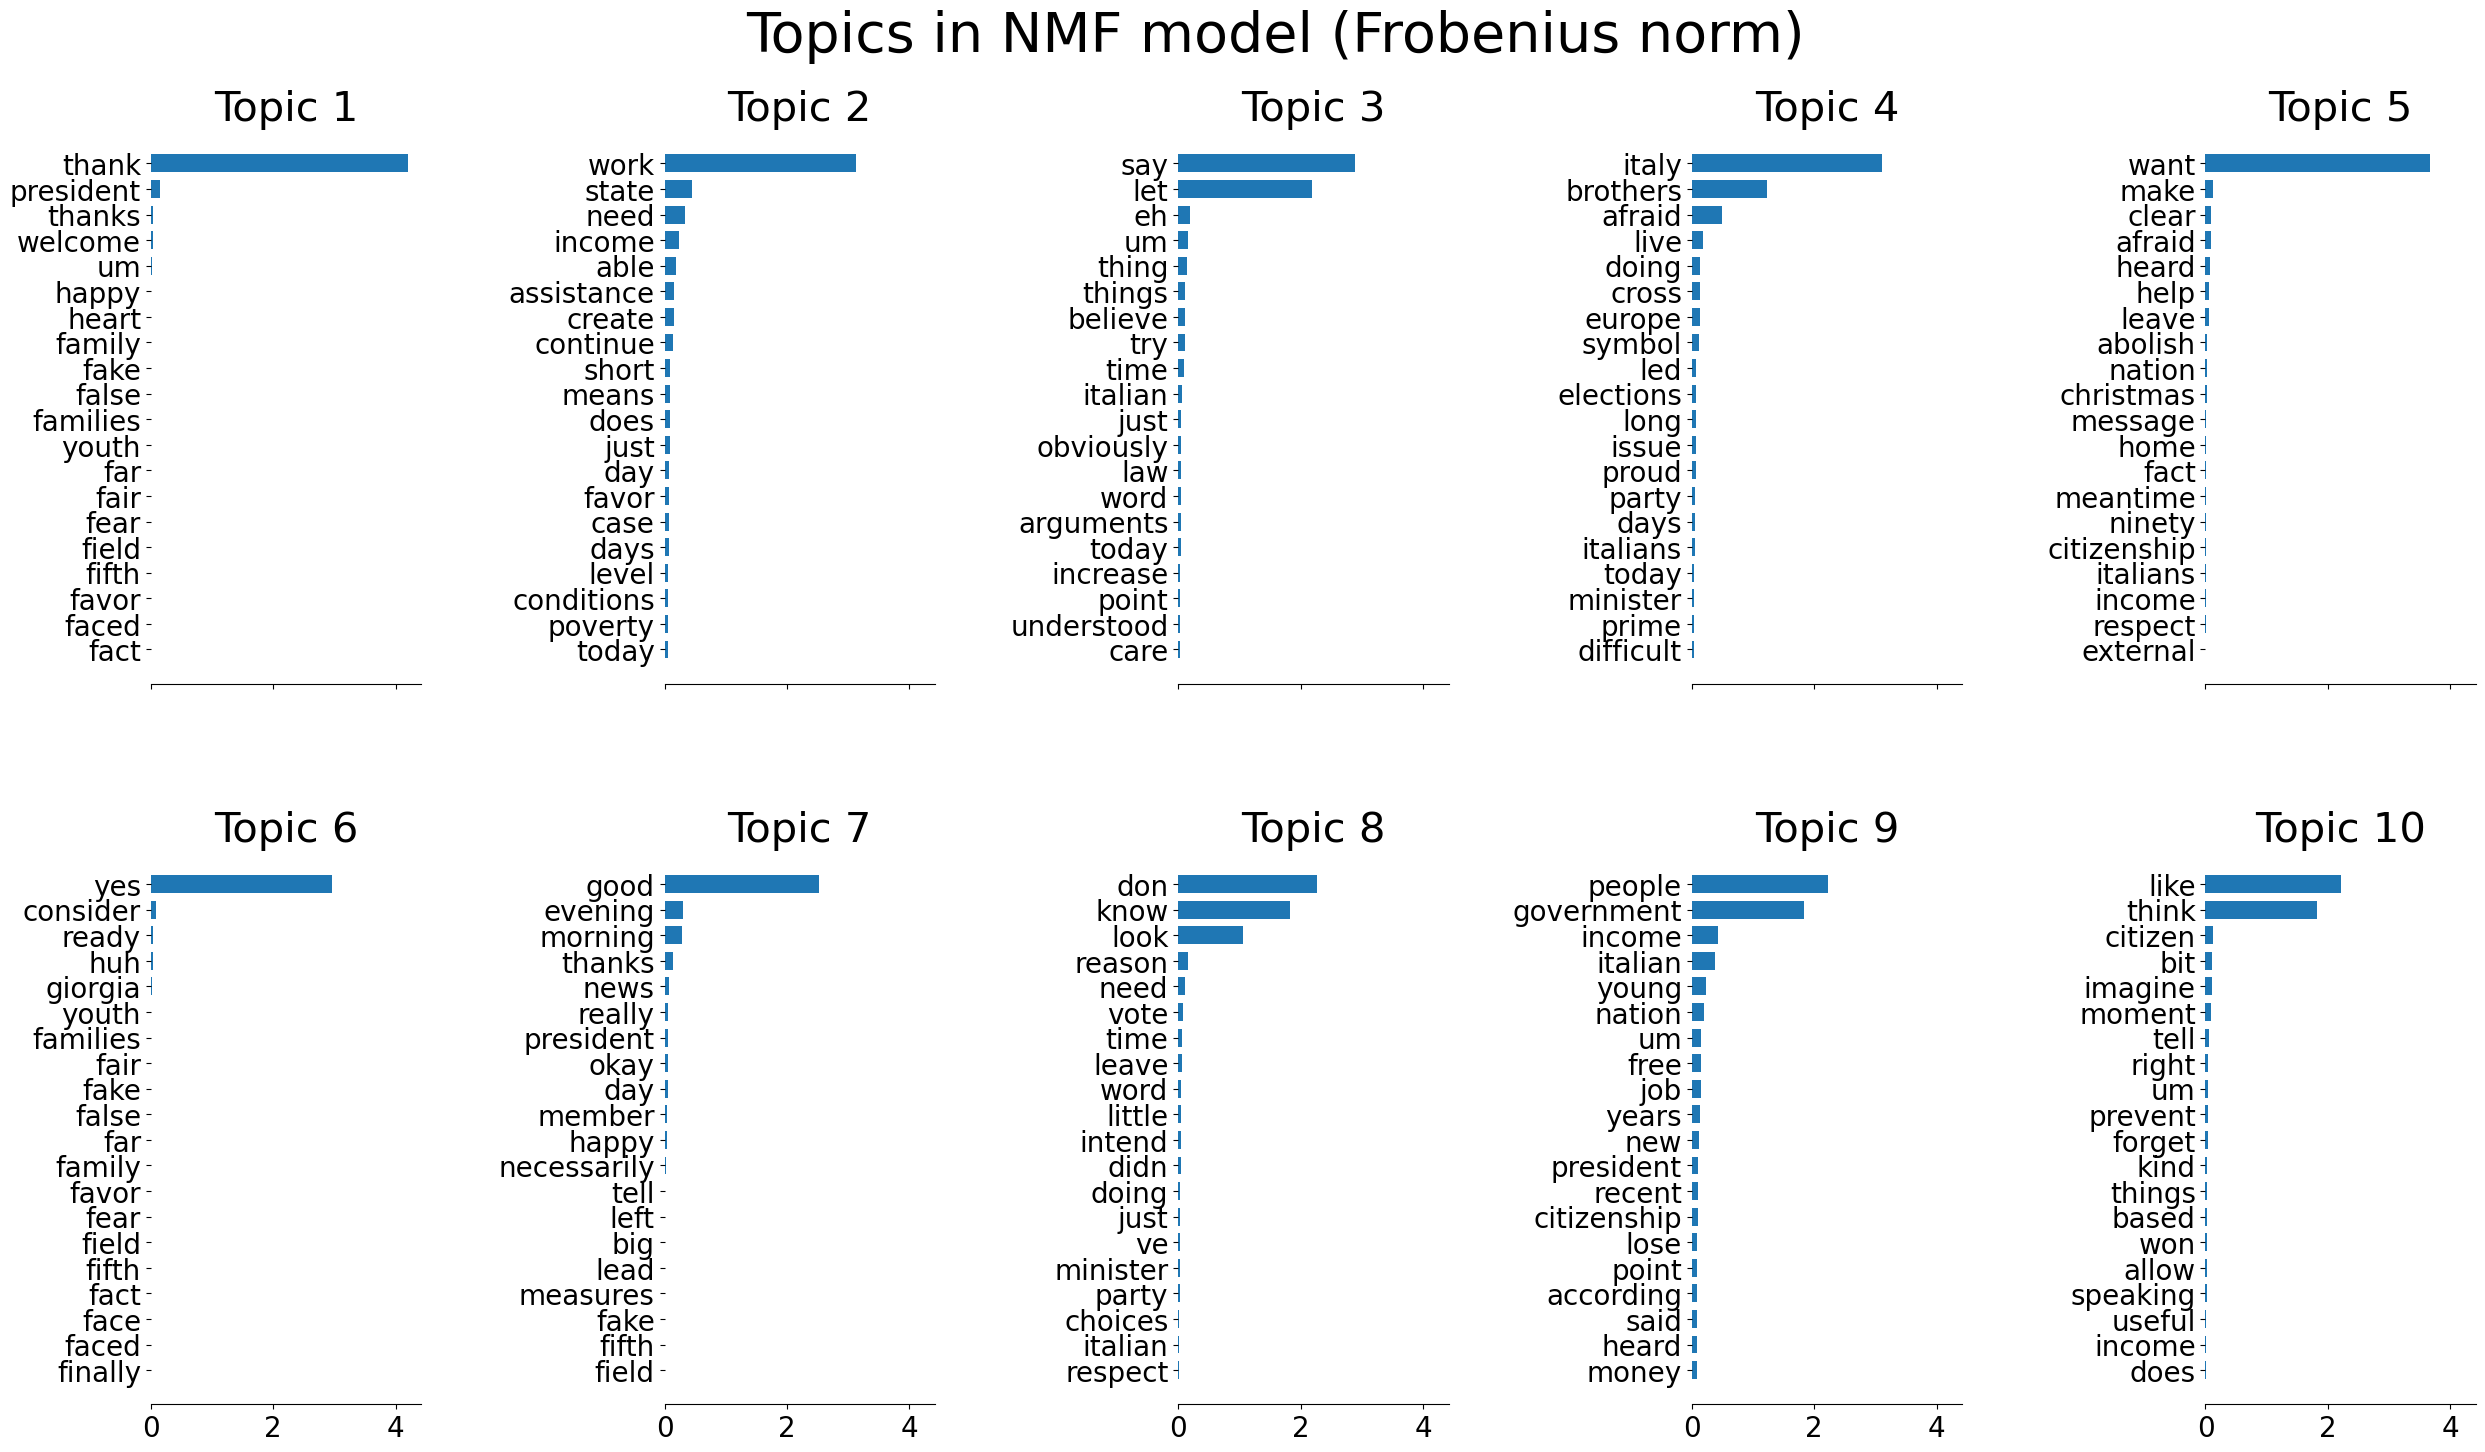



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.638s.


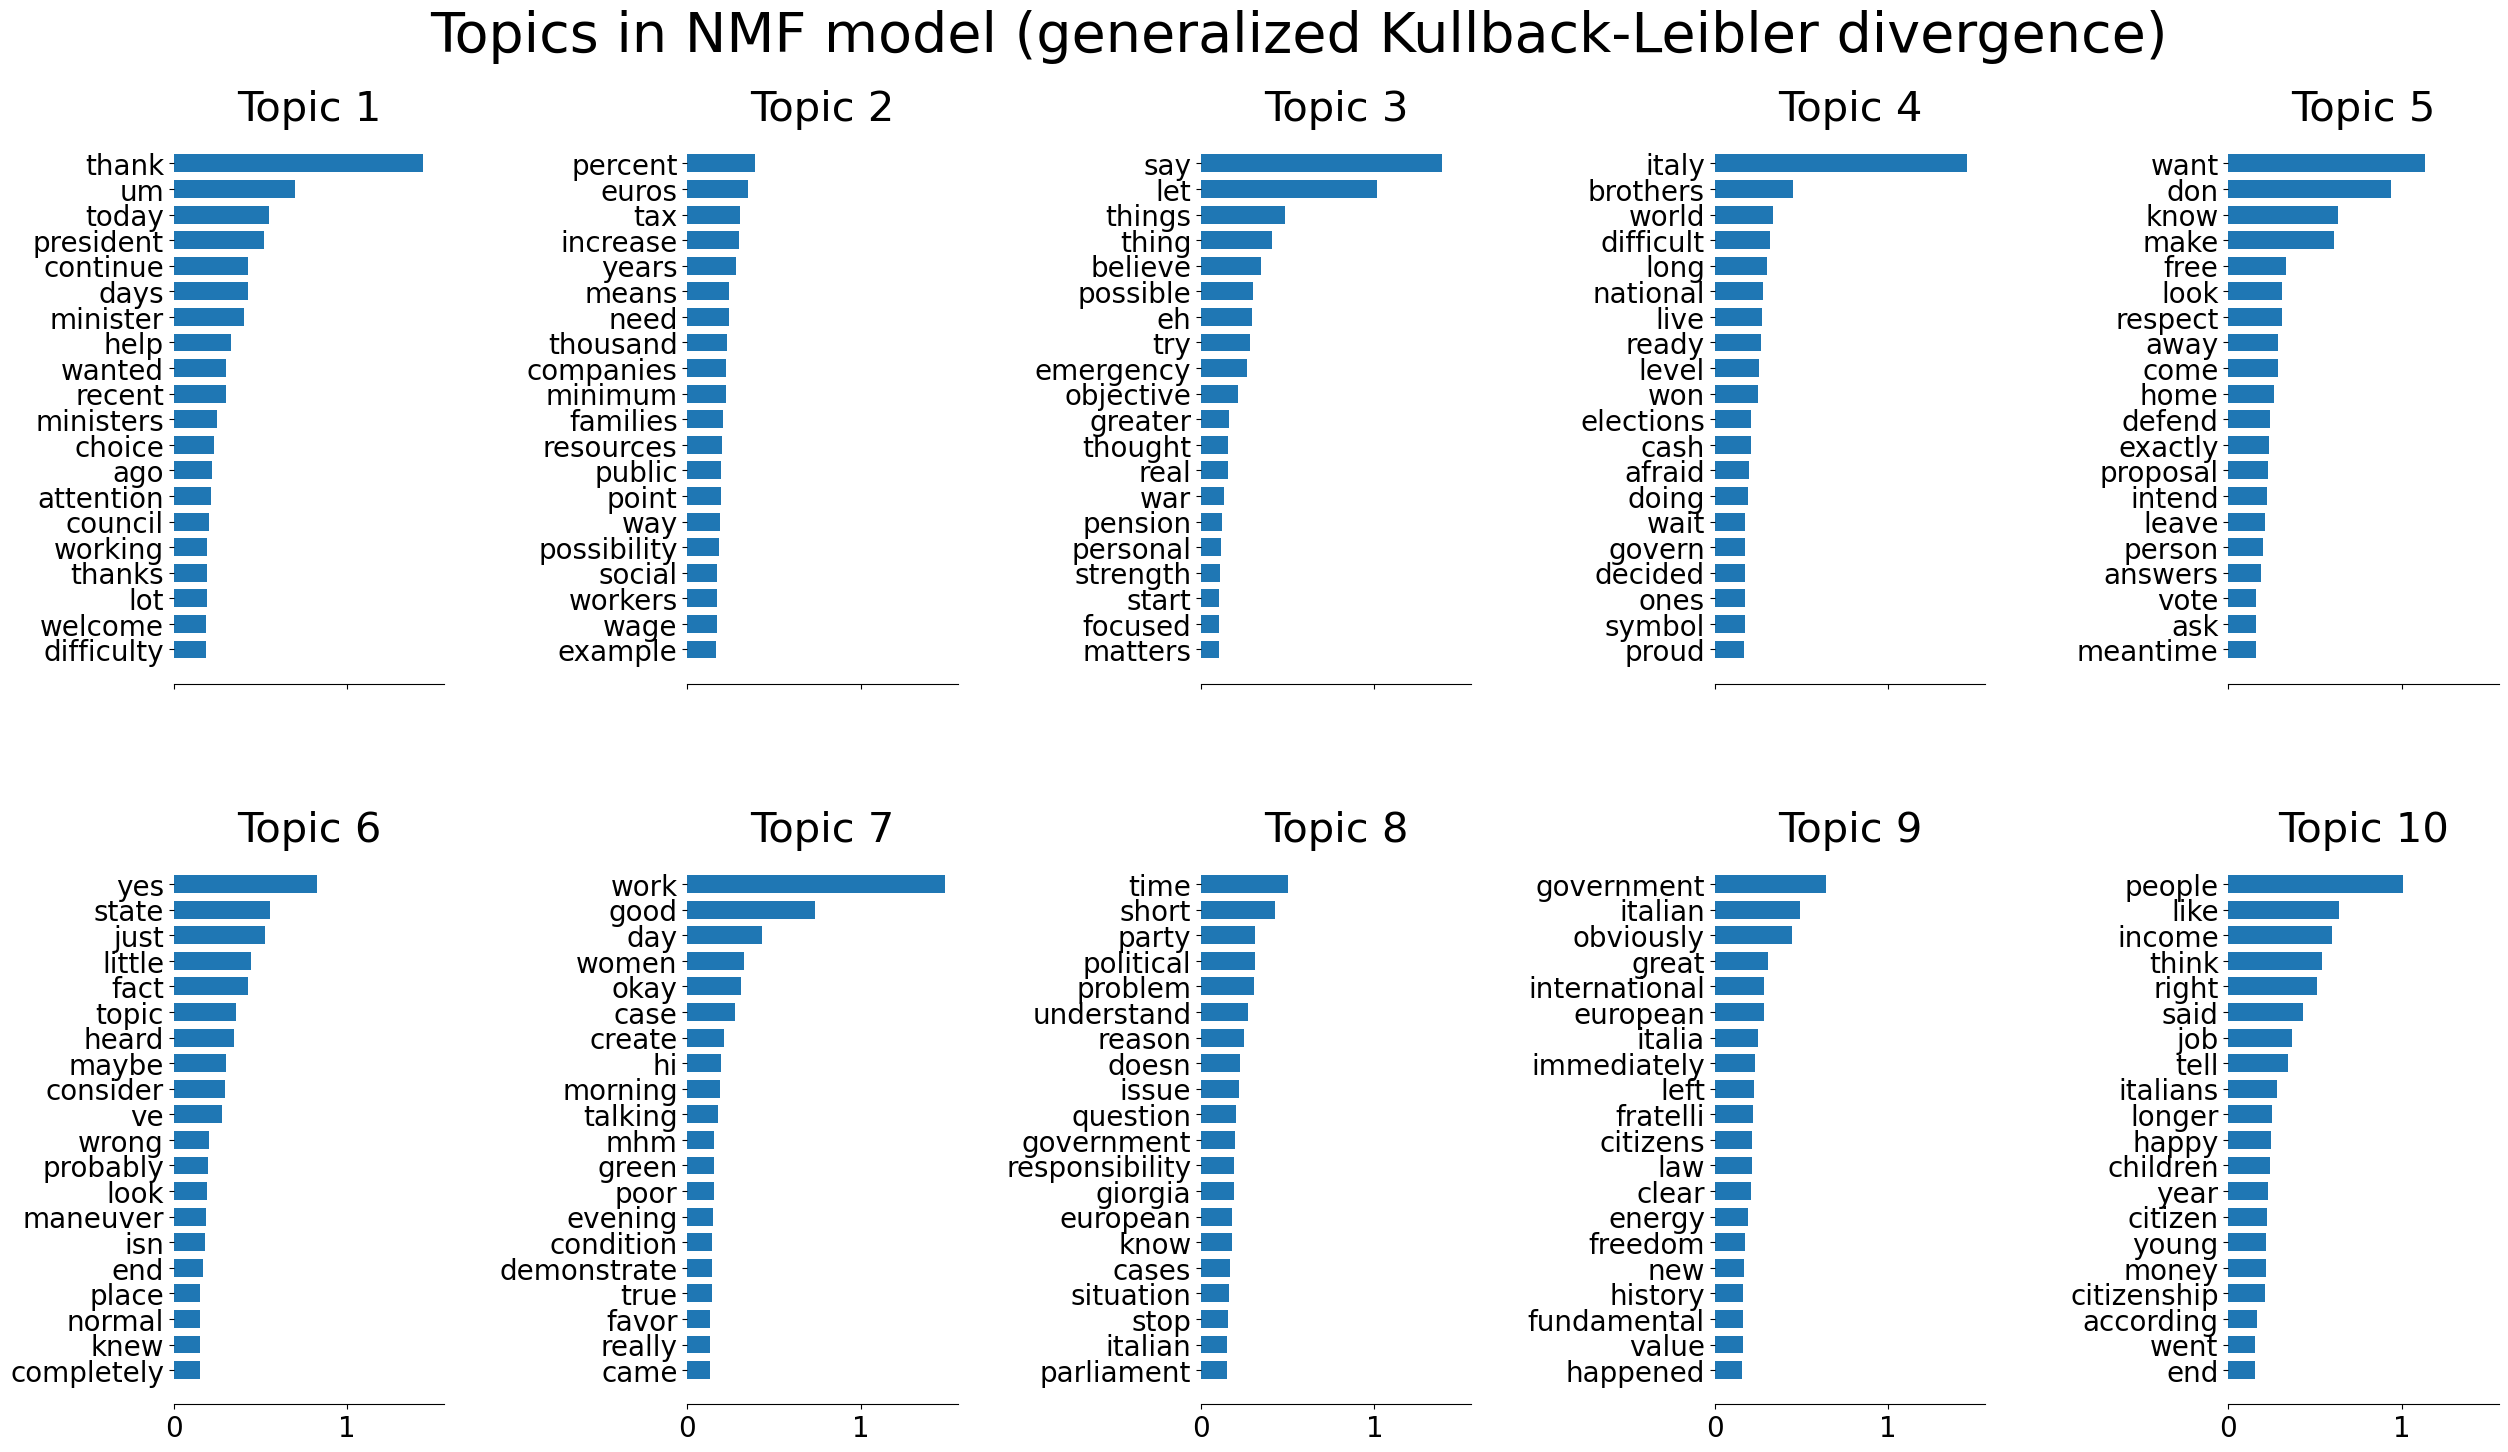



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.308s.


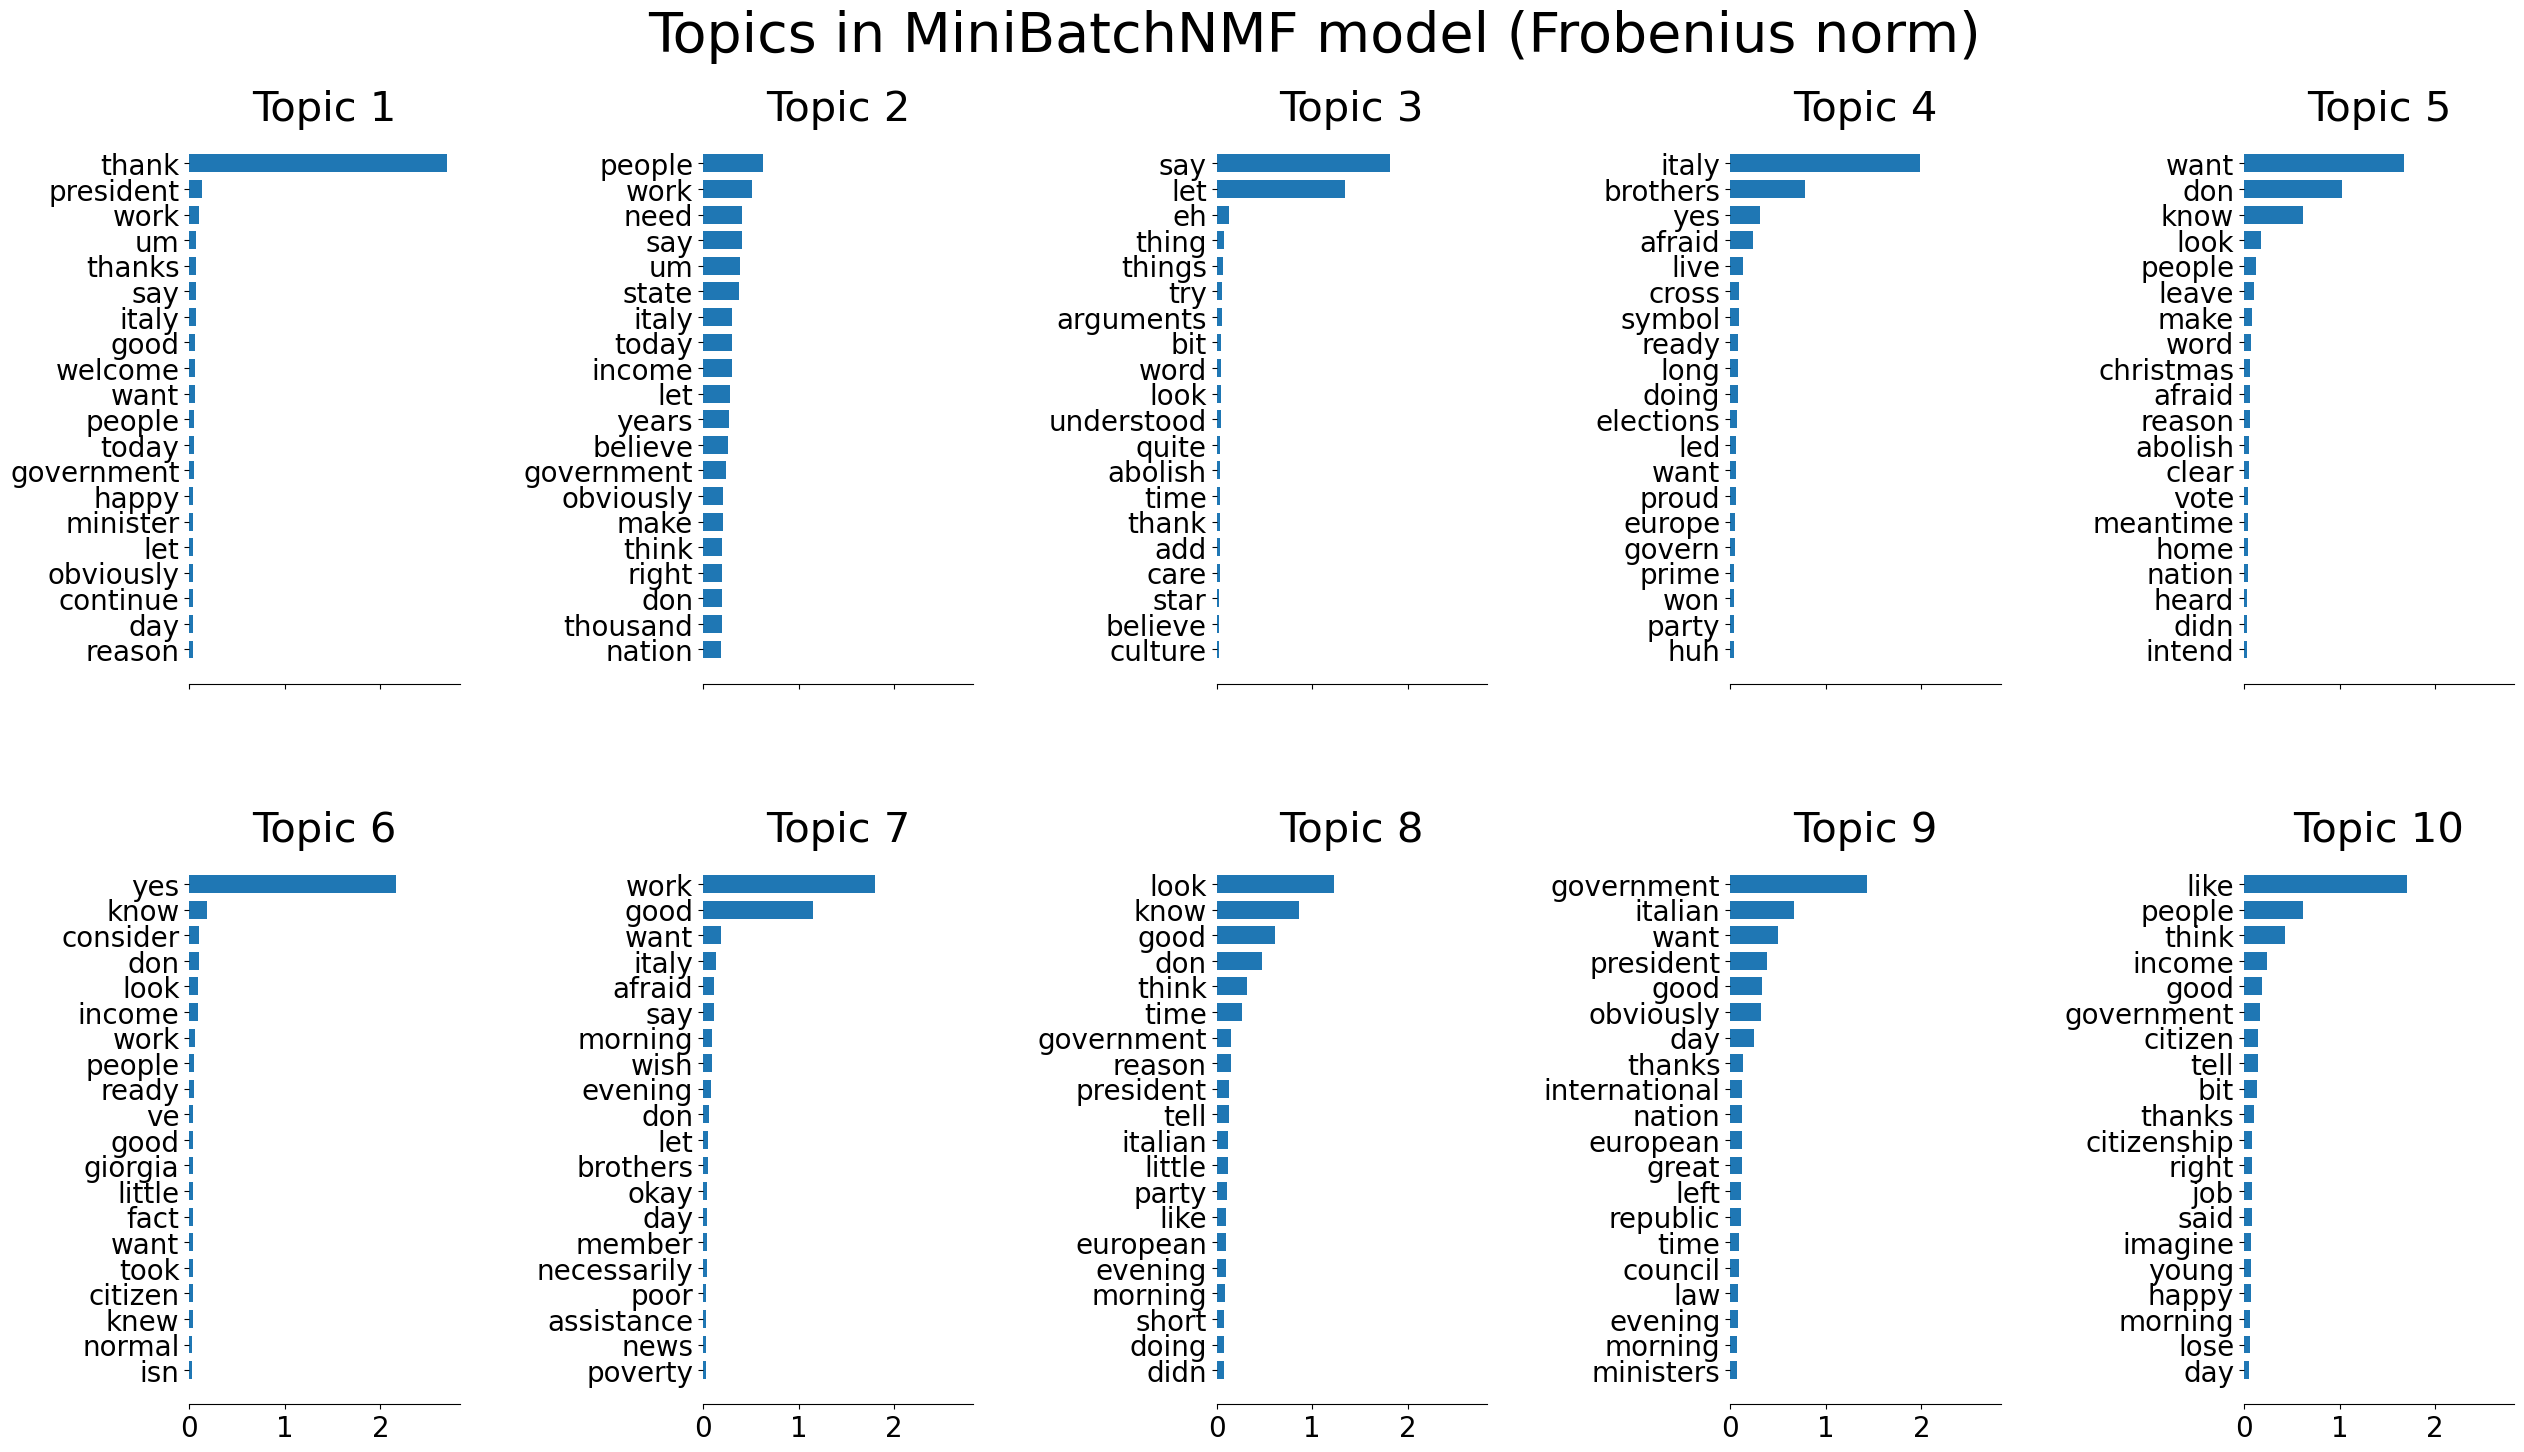



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.444s.


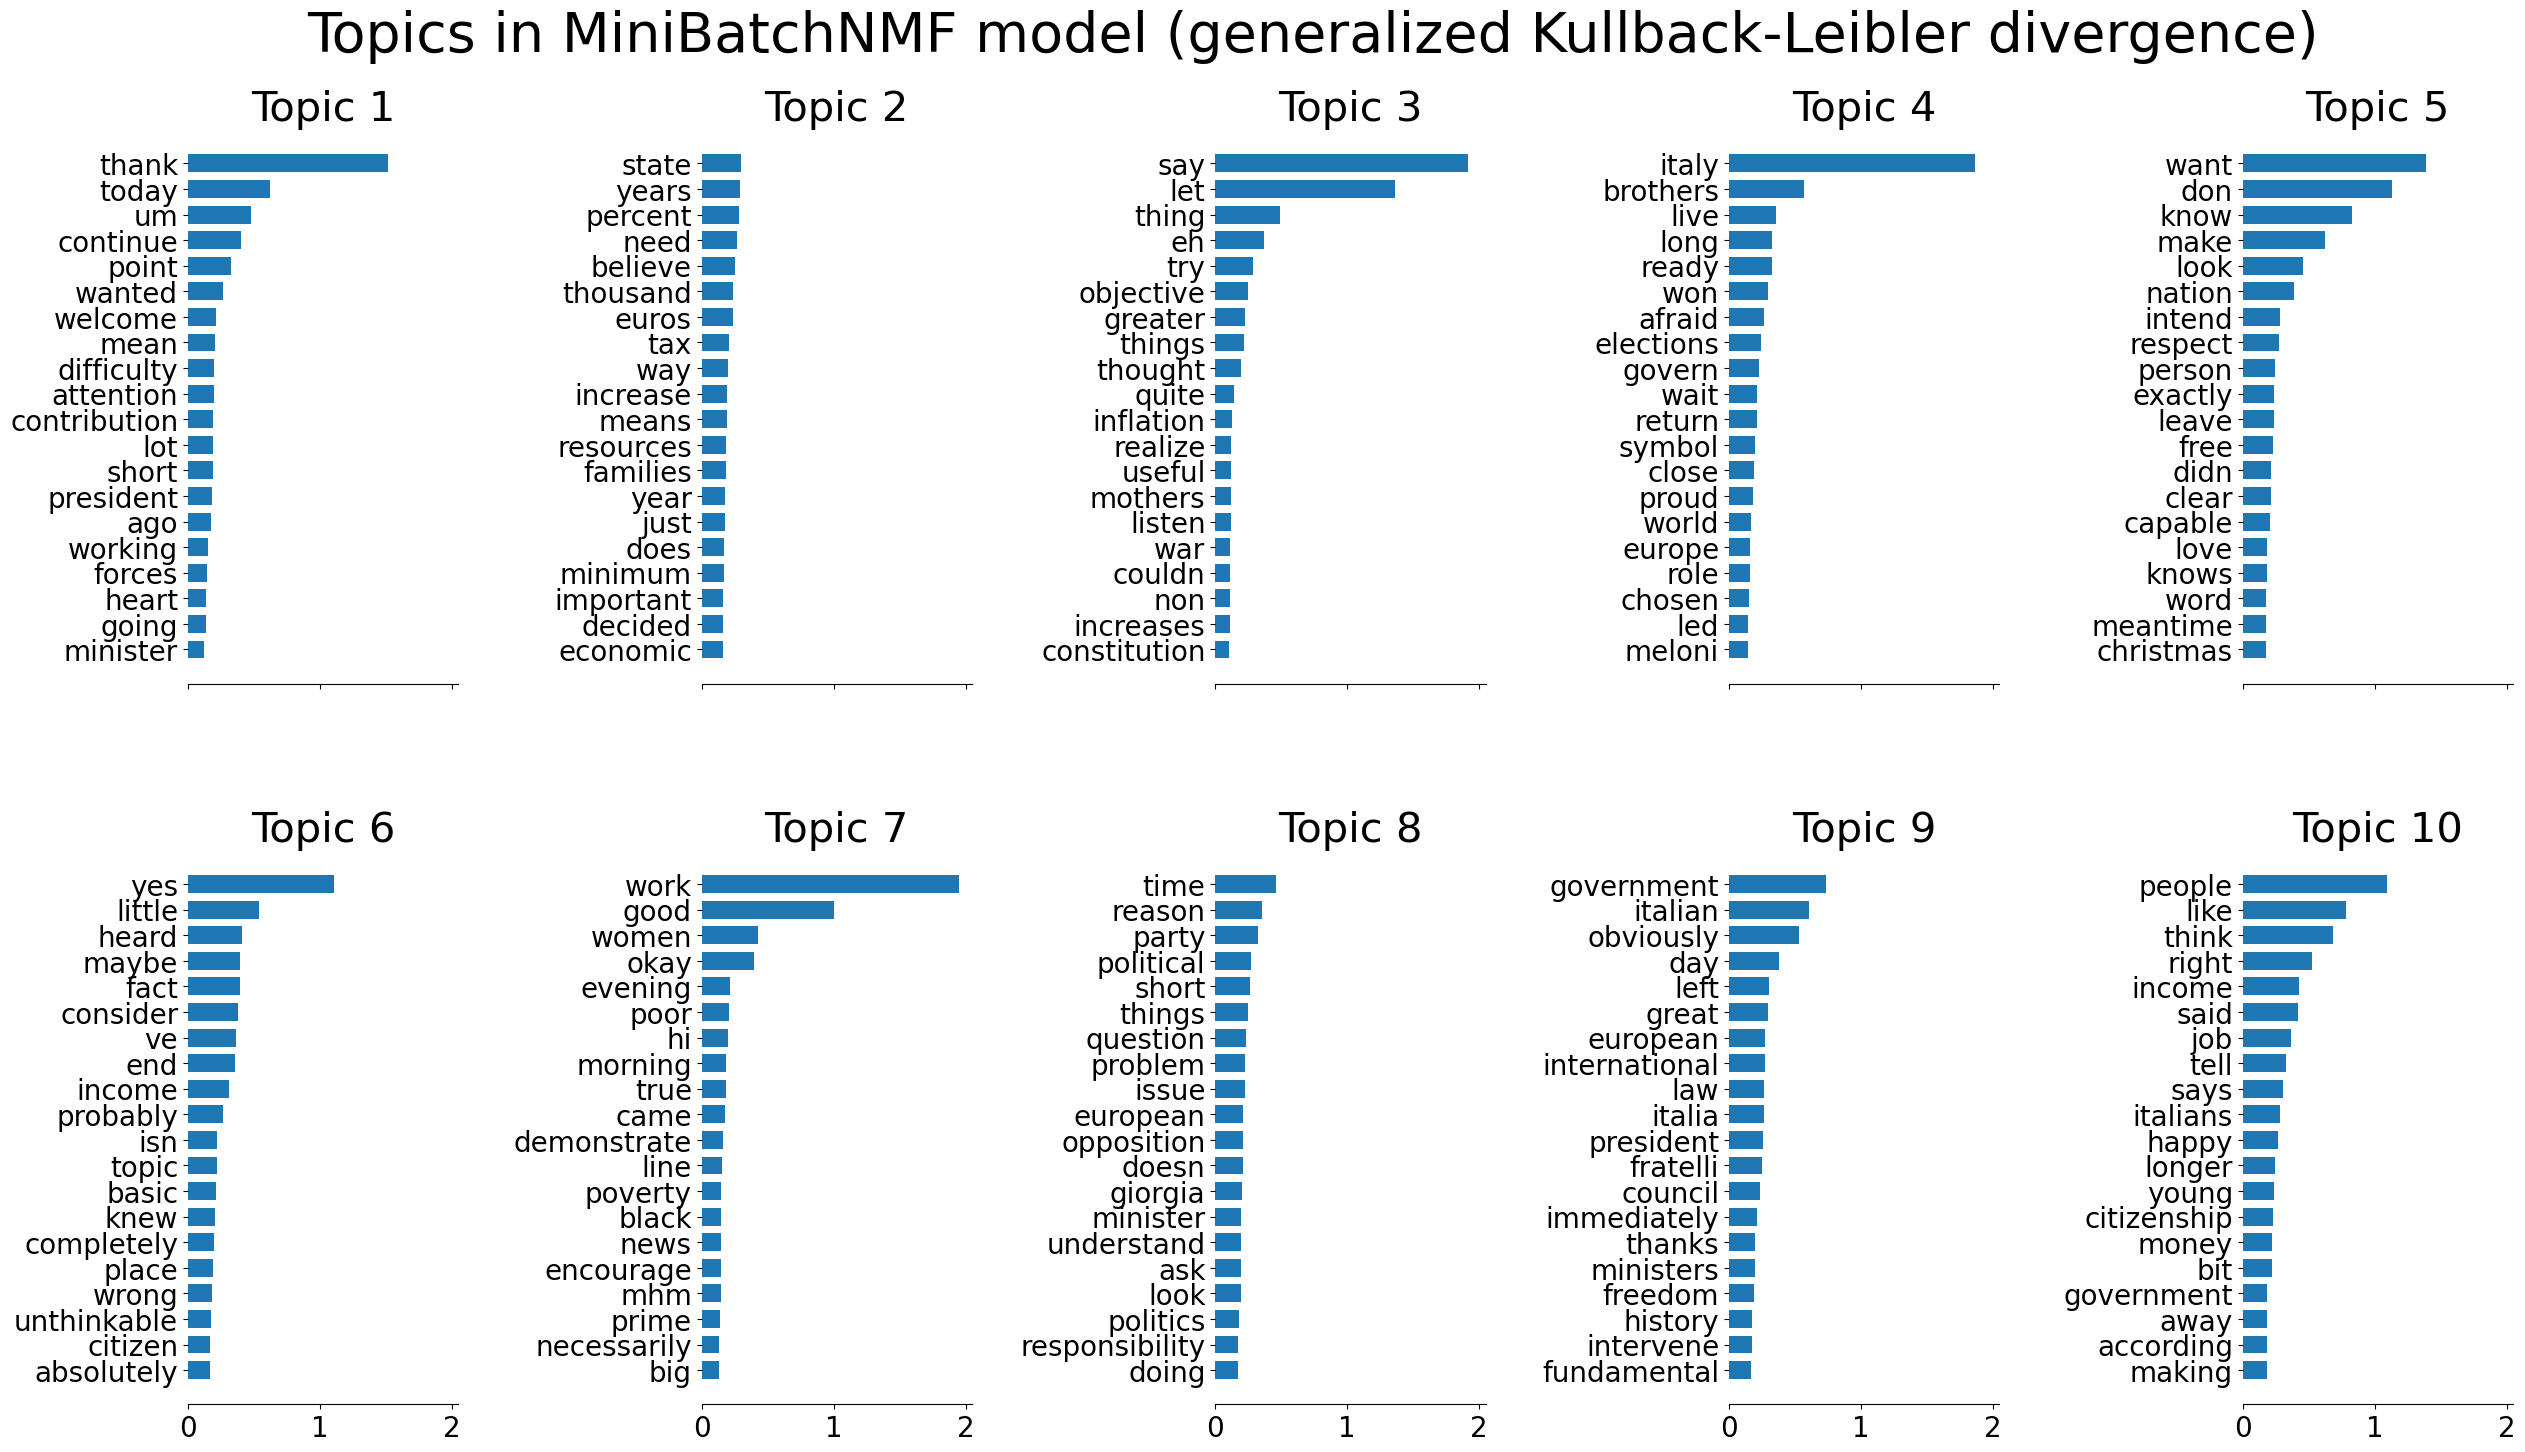



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.619s.


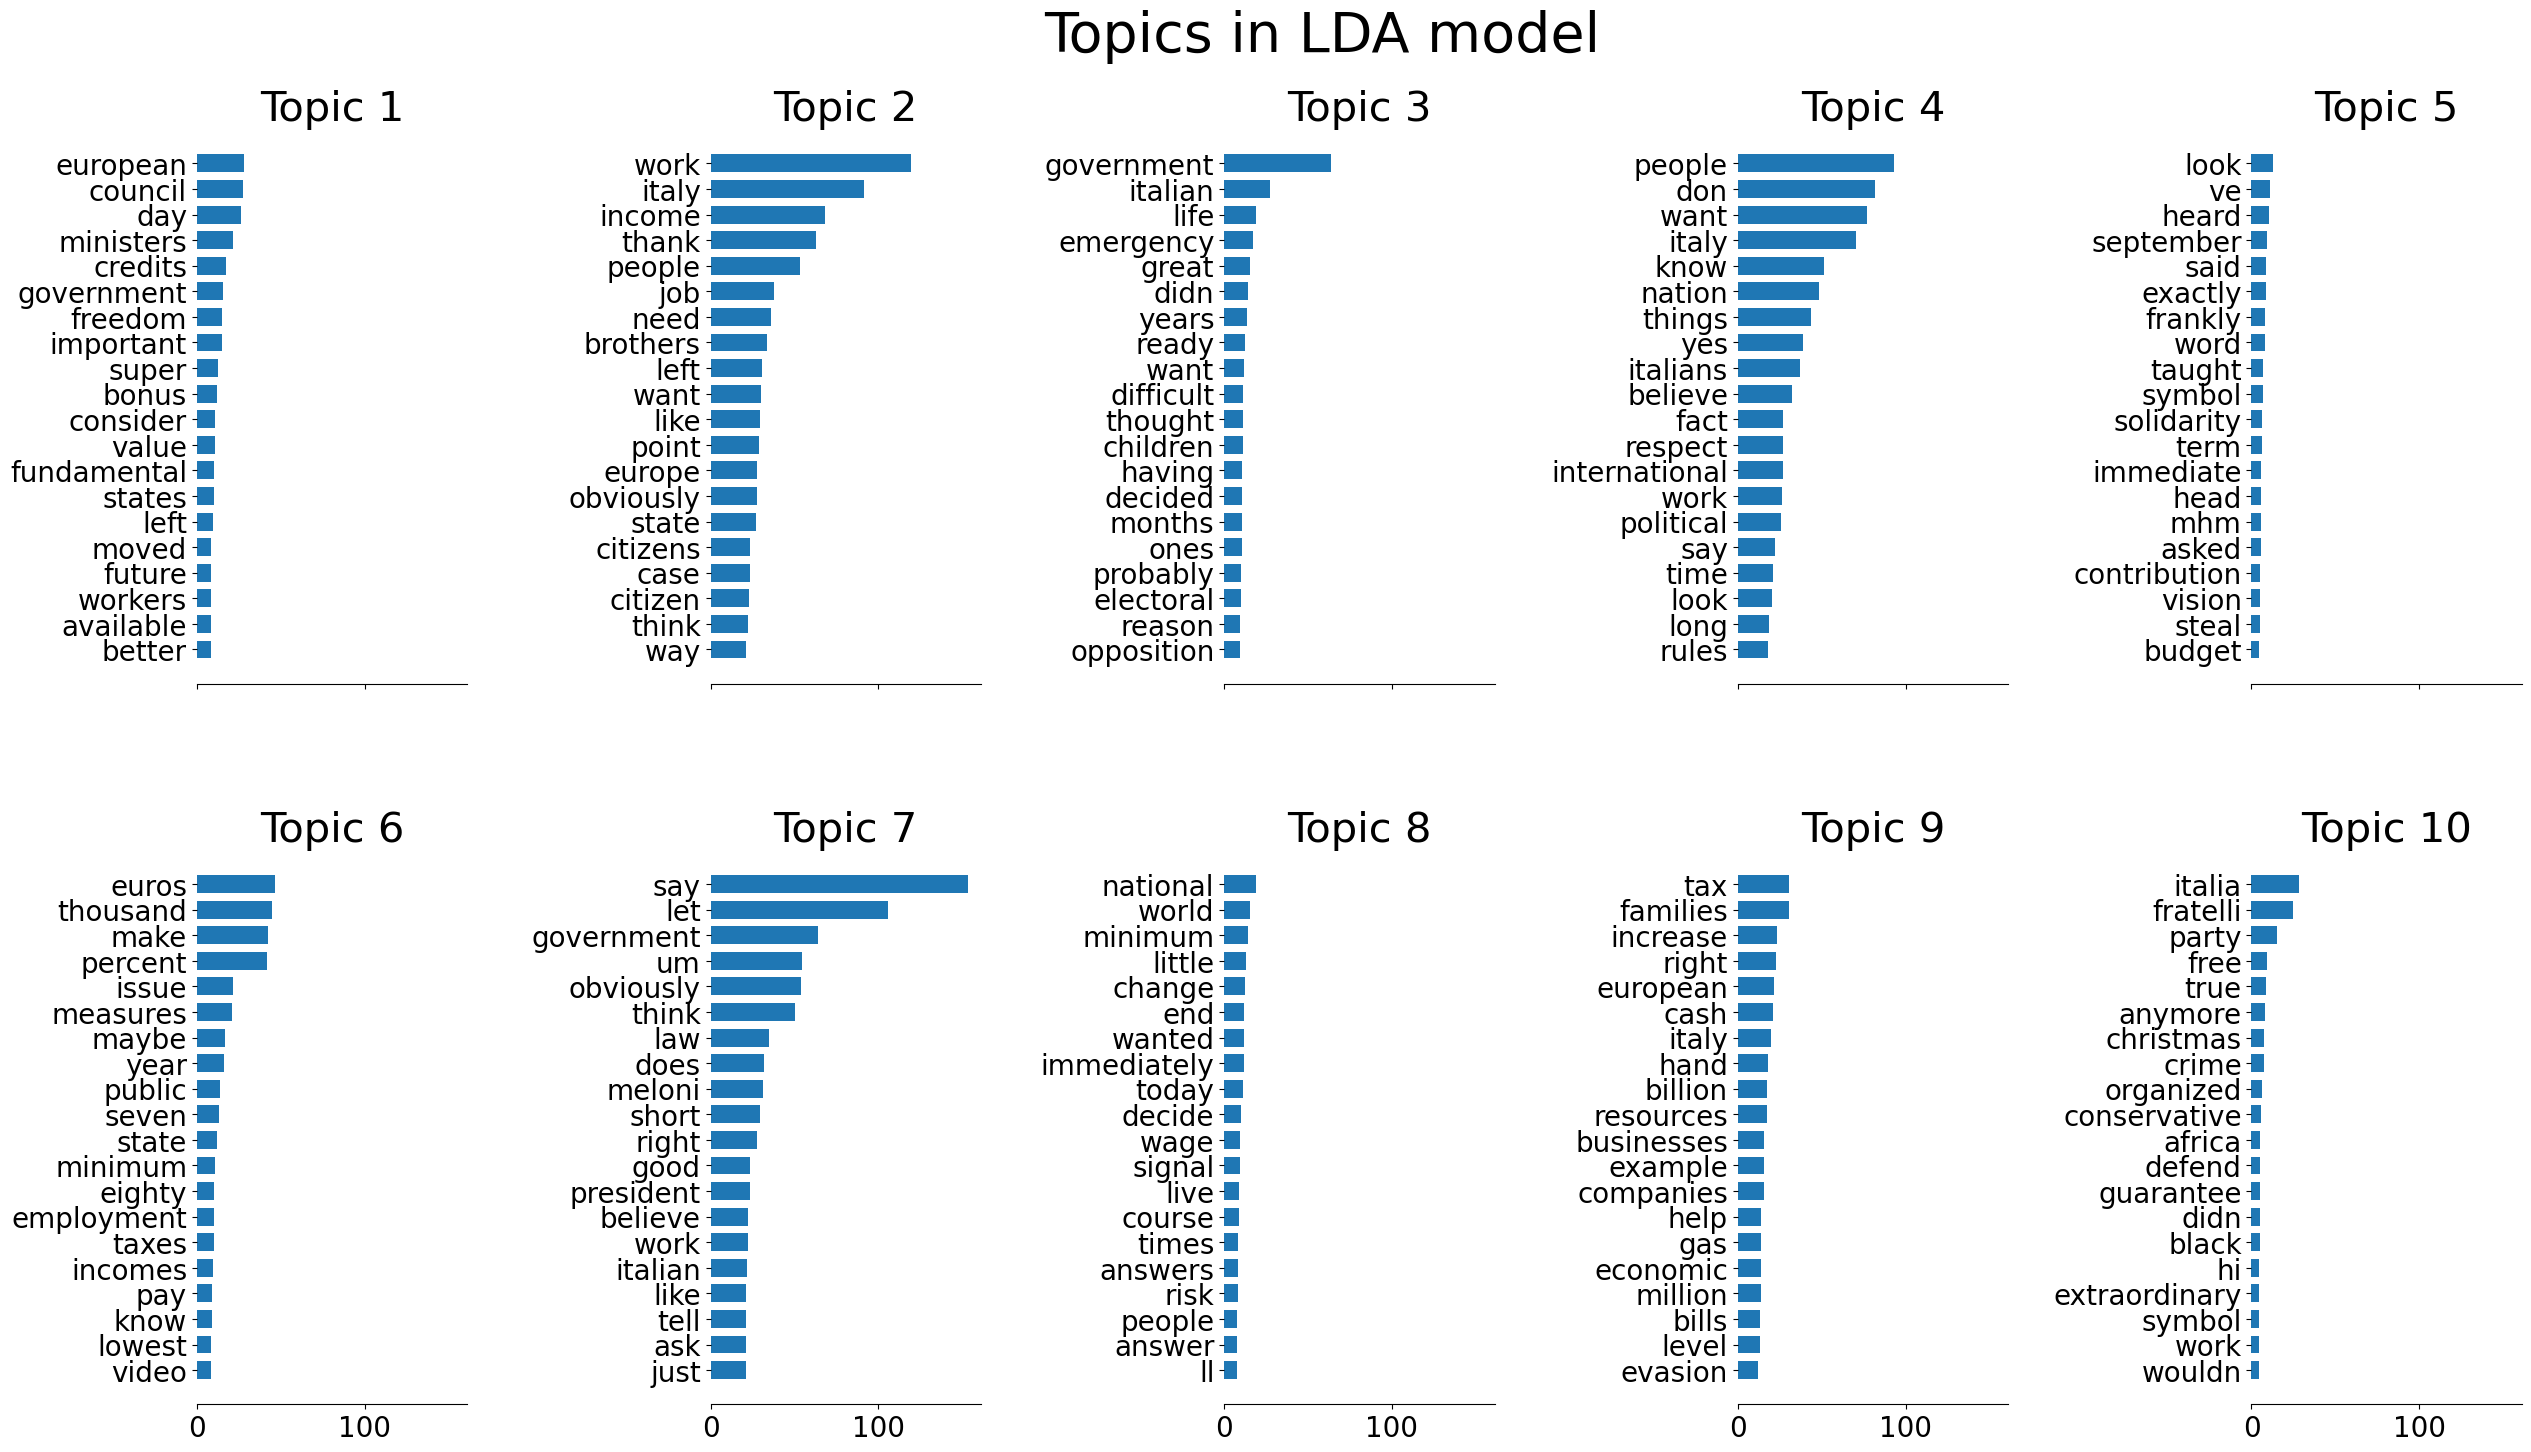

In [33]:
from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

print("Loading dataset...")
t0 = time()

data_samples = docs[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")    